In [1]:
# 共享引用
a = 3
b = a

In [2]:
a = 'spam'
print('a=%s, b=%d' %(a, b))

a=spam, b=3


In [3]:
# 原处修改
L1 = [1,2,4]
L2 = L1
print(L1, L2)
L1[0] = 111
print(L1, L2)

[1, 2, 4] [1, 2, 4]
[111, 2, 4] [111, 2, 4]


In [4]:
L1 = [1,2,4]
L2 = L1[:]
print(L1, L2)
L1[0] = 1555
print(L1, L2)

[1, 2, 4] [1, 2, 4]
[1555, 2, 4] [1, 2, 4]


In [5]:
s = [2,3,4]
m = s
print('same value: ', m == s, '---------值的同一性')
print('same object: ', m is s, '---------对象的同一性 （更严格形式的相等测试）')

same value:  True ---------值的同一性
same object:  True ---------对象的同一性 （更严格形式的相等测试）


In [6]:
import sys
# 查询一个对象被引用的次数
print(sys.getrefcount([1,2,3]))
print(sys.getrefcount(1))

1
2556


In [7]:
help('s'.strip)

Help on built-in function strip:

strip(...) method of builtins.str instance
    S.strip([chars]) -> str
    
    Return a copy of the string S with leading and trailing
    whitespace removed.
    If chars is given and not None, remove characters in chars instead.



In [8]:
print('a\nb\tc\'s')    # print会将字符串反斜杠字符解释出来
'a\nb\tc\'s'           # 交互模式下不解释，直接以转义字符的形式回显

a
b	c's


"a\nb\tc's"

In [9]:
strs = '  a,b,c,dc,'
print(strs.strip(',').strip())

a,b,c,dc


# python类 super()函数用法
- Refer:https://mozillazg.com/2016/12/python-super-is-not-as-simple-as-you-thought.html

In [10]:
# 单继承：常规父类调用

In [11]:
# 多继承
class A:
    def __init__(self):
        self.n = 2

    def add(self, m):
        print('self is {0} @A.add'.format(self))
        self.n += m


class B(A):
    def __init__(self):
        self.n = 3

    def add(self, m):
        print('self is {0} @B.add'.format(self))
        super().add(m)
        self.n += 3

In [12]:
class C(A):
    def __init__(self):
        self.n = 4

    def add(self, m):
        print('self is {0} @C.add'.format(self))
        super().add(m)
        self.n += 4

class C1(A):
    def __init__(self):
        self.n = 4

    def add_modify(self, m):                    # <------------------ 函数名有更改
        print('self is {0} @C.add'.format(self))
        super().add(m)
        self.n += 4
        
        
class D(B, C):
    def __init__(self):
        self.n = 5

    def add(self, m):
        print('self is {0} @D.add'.format(self))
        super().add(m)
        self.n += 5
        
class D1(B, C1):
    def __init__(self):
        self.n = 5

    def add(self, m):
        print('self is {0} @D.add'.format(self))
        super().add(m)
        self.n += 5

In [13]:
d = D()
print(d.n)
D.mro()
# 

5


[__main__.D, __main__.B, __main__.C, __main__.A, object]

In [14]:
d.add(2)

self is <__main__.D object at 0x00000212DD8A3B38> @D.add
self is <__main__.D object at 0x00000212DD8A3B38> @B.add
self is <__main__.D object at 0x00000212DD8A3B38> @C.add
self is <__main__.D object at 0x00000212DD8A3B38> @A.add


In [15]:
d1 = D1()
print(d1.n)
D1.mro()

5


[__main__.D1, __main__.B, __main__.C1, __main__.A, object]

In [16]:
d1.add(2)

self is <__main__.D1 object at 0x00000212DD886CF8> @D.add
self is <__main__.D1 object at 0x00000212DD886CF8> @B.add
self is <__main__.D1 object at 0x00000212DD886CF8> @A.add


In [17]:
print(d.n, d1.n)
# D1的MRO中虽然有C1，但是C1中没有 add方法（更改为add_modify了），所以add方法的调用顺序直接是DBA

19 15


## Super是个类
- 当我们调用 super() 的时候，实际上是实例化了一个 super 类。你没看错， super 是个类，既不是关键字也不是函数等其他数据结构:

In [18]:
s = super(A)
type(s)

super

- super(type, obj): obj must be an **instance** or **subtype of type**
        MRO 列表指的是 type(obj) 的 MRO 列表, MRO 中的那个类就是 a_type , 
        同时 isinstance(obj, a_type) == True
        --> obj是type的一个实例
- super(type1, type2): 
        MRO 指的是 type2 的 MRO 列表, MRO 中的那个类就是 type1 ，
        同时 issubclass(type2, type1) == True
        --> type2是type1的子类

In [19]:
# C 是 A 的子类
super(A, C)

<super: __main__.A, __main__.C>

In [21]:
# A 不是 C 的子类，报错
try:
    super(C, A)
except Exception as e:
    print(e)

super(type, obj): obj must be an instance or subtype of type


In [22]:
# d 是 A 的一个实例
super(A, d)

<super: __main__.A, <__main__.D at 0x212dd8a3b38>>

- super() 实际上做了啥呢？简单来说就是：提供一个 MRO 列表以及一个 MRO 中的类 C ， super() 将返回一个从 MRO 列表中 **C 之后的类**中查找方法的对象
- 也就是说，查找方式时不是像常规方法一样从所有的 MRO 类中查找，而是从 MRO 列表的 tail 中查找。

In [24]:
# 运行和调用过程
d = D()
d.add(2)
print(d.n)

self is <__main__.D object at 0x00000212E0335BA8> @D.add
self is <__main__.D object at 0x00000212E0335BA8> @B.add
self is <__main__.D object at 0x00000212E0335BA8> @C.add
self is <__main__.D object at 0x00000212E0335BA8> @A.add
19


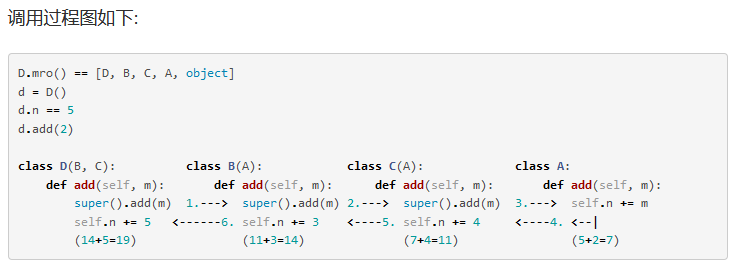
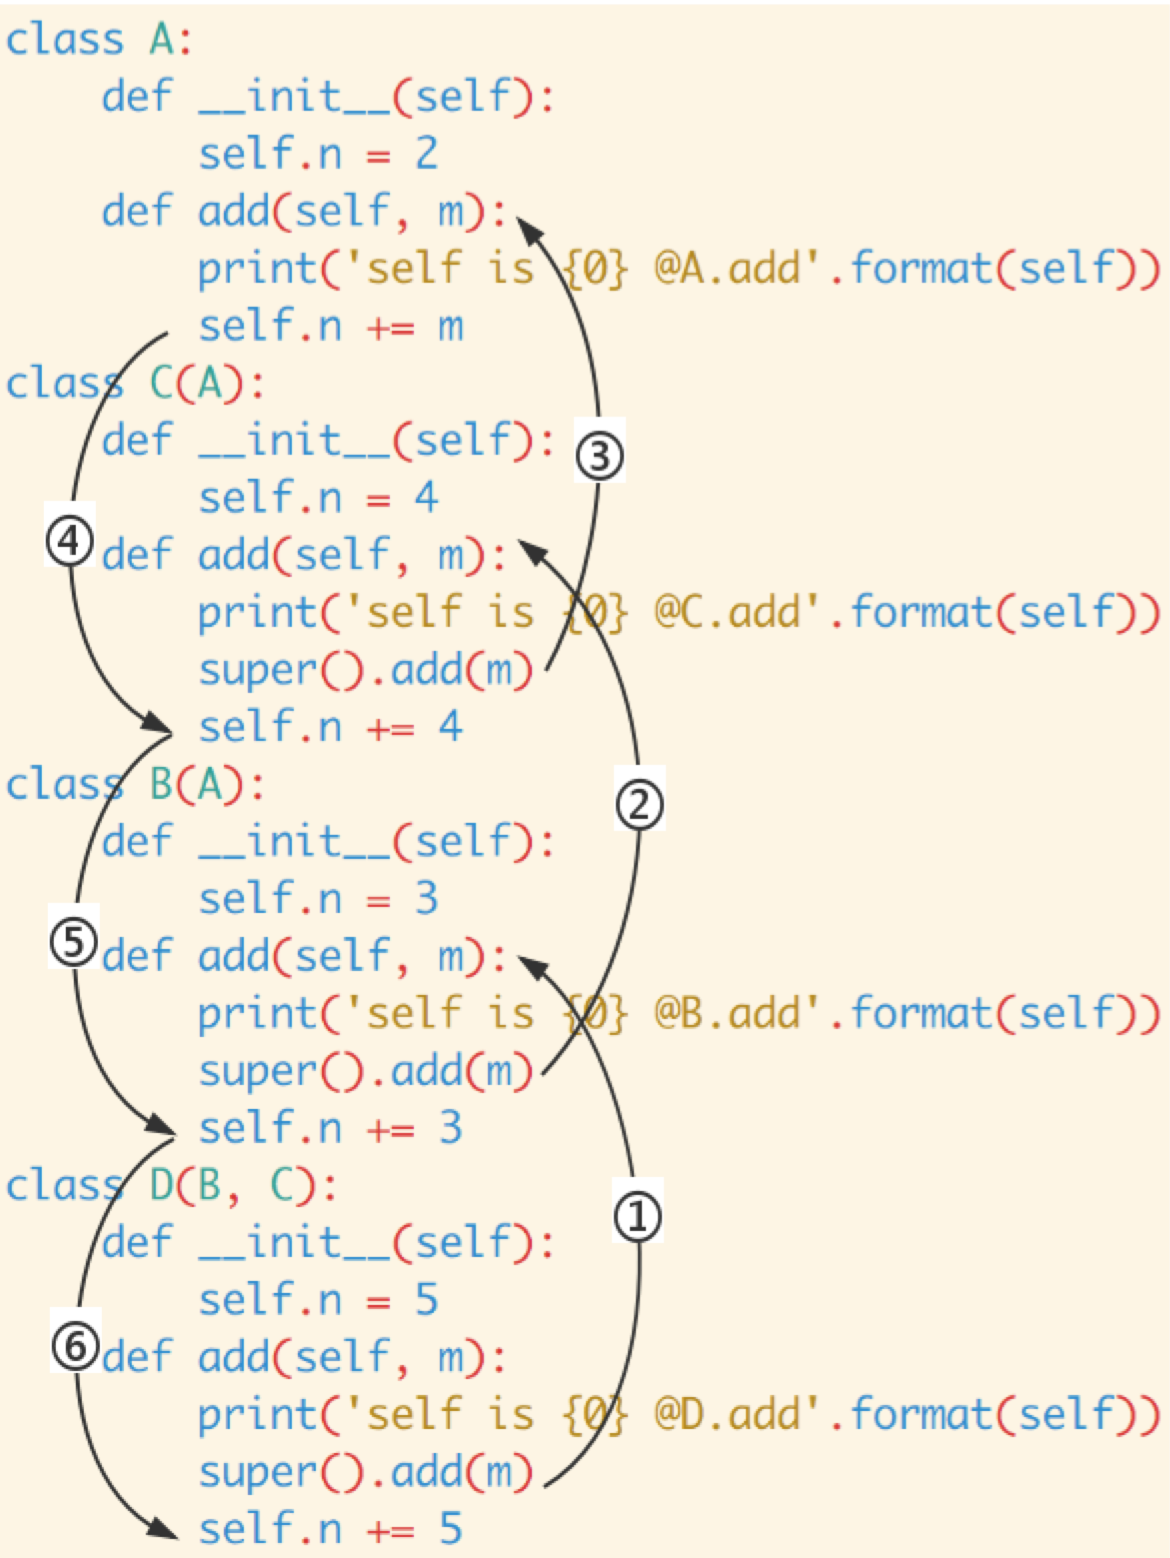